In [1]:
# import os
# from google.colab import files
# fs = os.listdir()
# for f in fs:
#   if "SNS_covid_prediction" in f:
#     files.download(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Source / Data Preprocessing
The data used in this project are downloaded from the website “Our World in Data”.  (https://ourworldindata.org/coronavirus-testing). 

The following python code downloads the comma-separated values (CSV) file from the website. 

In [2]:
import requests
import pandas as pd
from zipfile import ZipFile

In [3]:
# Download owid-covid-data.csv
csv_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
req = requests.get(csv_url)
url_content = req.content
csv_file = open('owid-covid-data.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

Let's have a look at the data we just download. Here are the first few rows:

In [4]:
# Load Csv file in to pandas DataFrame
df = pd.read_csv("owid-covid-data.csv", parse_dates=["date"])
df.head()

 This dataset contains 59 features such as total_cases, new_cases and total_deaths (Not all the features are shown in the picture above). And it contains the data from all around the world (Many thanks to their hard work in collecting these data).

However, we are only interested in the data for the United Kingdom.

Let’s filter out the data for the UK only. This is done by dropping all the rows where the iso_code is not GBR. 

In [5]:
# Filter the data for United Kingdom only
df_uk = df.drop(df[df.iso_code != 'GBR'].index)
df_uk.head()

 Let’s pick a starting date and ending date of the data that we are going to use.

I have selected the data from March 2020 to Feb 2021, exactly a year of data. 

In [6]:
# Set a starting date and ending date of the data
STARTING_DATE = '2020-3-1'
ENDING_DATE = '2021-2-28'
# Select from March to Feb 2021. Data for exactly 1 year
df_uk = df_uk[(df_uk['date'] >= STARTING_DATE) & (df_uk['date'] <= ENDING_DATE)]

### Additional Features

I have decided to add two new features to the dataset. They are case_population_ratio and case_population_density_ratio. These two features are added because these features can represent the relationship between the number of cases to the population. These two features can be generated from existing features (total_cases, population and population_density). 

In [7]:
# Add new features such as total_case/population
df_uk["case_population_ratio"] = df_uk["total_cases"] / df_uk["population"]
df_uk["case_population_density_ratio"] = df_uk["total_cases"] / df_uk["population_density"]

### Inspect and cleanup
Next look at the statistics of the dataset:

In [8]:
df_uk.describe().transpose()

### Missing Data and Constant Value Data

#### Missing Data
We can see that not all of the features have the count of 365 (some missing data). This is because of a few reasons.

1.   Not all the data are available from the earlier stage of the pandemic
2.   Not all the features are collected in the UK
3.   Not all the features are updated daily

For example, there is no data related to vaccination in the earlier stage of the pandemic.

There are methods to compensate for missing data, for example, fill by mean, forwards/backwards filling or fill by 0. In this case, the data we have are time series data, fill by mean won’t be a good option. Also, I have decided to drop features where there are too many missing data and only apply filling to features that have only a few missing data.

One thing to note is the feature handwashing_facilities, this has 0 counts. There is because the dataset is collected from the whole world, other countries might have data for handwashing_facilities, but the UK doesn’t. 

#### Constant Value Data
Besides the missing data, some data are constants. For example features like population and median_age. This is because the dataset contains the data across the whole world, these data are useful when we are considering on a global scale, but not that useful when we are focusing on the United Kingdom.

There are also a few features which are smoothed data or per million data, these data wouldn’t be included as these data are similar to the non-smoothed data. 

In [9]:
# Drop country dependent columns such as "iso_code", "continent", "location" as data is only for UK
df_uk = df_uk.drop(["iso_code", "continent", "location"], axis=1)

# Drop columns which are constant across the range of date
df_uk = df_uk.drop(["population", "median_age", "aged_65_older", "aged_70_older", "gdp_per_capita",
                    "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", "male_smokers",
                    "hospital_beds_per_thousand", "life_expectancy", "human_development_index", "population_density"], axis=1)

# Drop columns which can't be fill with data before or after
df_uk = df_uk.drop(["people_vaccinated", "people_fully_vaccinated", "new_vaccinations_smoothed", "handwashing_facilities",
                    "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred",
                    "new_vaccinations_smoothed_per_million", "weekly_icu_admissions", "weekly_icu_admissions_per_million",
                    "weekly_hosp_admissions", "weekly_hosp_admissions_per_million", "total_vaccinations","new_vaccinations",
                    "total_vaccinations_per_hundred", "icu_patients", "hosp_patients","new_tests", "total_tests", "positive_rate", 
                    "tests_units", "tests_per_case"], axis=1)

# Drop columns which are smoothed data or per million data.
df_uk = df_uk.drop(["new_cases_smoothed", "new_deaths_smoothed", "total_cases_per_million", "new_cases_per_million",
                    "new_cases_smoothed_per_million","total_deaths_per_million","new_deaths_per_million","new_deaths_smoothed_per_million",
                    "icu_patients_per_million", "hosp_patients_per_million","total_tests_per_thousand", "new_tests_per_thousand", 
                    "new_tests_smoothed", "new_tests_smoothed_per_thousand"], axis=1)

### Filling in missing data

After dropping features that we are not interested in, we can now fill in the missing data by forwards/backwards filling or fill by 0. 

In [10]:
df_uk.head()

In [11]:
df_uk.tail()

In [12]:
df_uk['total_deaths'] = df_uk['total_deaths'].fillna(0)
df_uk['new_deaths'] = df_uk['new_deaths'].fillna(0)
df_uk['reproduction_rate'] = df_uk['reproduction_rate'].fillna(method='bfill')
df_uk['stringency_index'] = df_uk['stringency_index'].fillna(method='ffill')

In [13]:
df_uk.describe().transpose()

### Data Visualisation

We have now preprocessed the data, let's visualise them.

In [14]:
date_time = df_uk['date']
date_time = pd.to_datetime(date_time)

plot_cols_1 = ["total_cases", "total_deaths","new_cases","new_deaths"]
plot_cols_2 = ["case_population_ratio","case_population_density_ratio"]
plot_cols_3 = ["reproduction_rate", "stringency_index"]
plot_features = df_uk[plot_cols_1]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_uk[plot_cols_2]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_uk[plot_cols_3]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

## The correlation between the features
A heat map can be plotted to see the correaltion between the features.

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt
C_mat = df_uk.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

From the correlation heat map above, we see that about 6 features are highly correlated with the `total_cases`.


### Save the csv
Let's save our processed data into a new csv.

In [16]:
df_uk.to_csv('owid-covid-data_uk.csv', index=False)

# Machine learning Framework
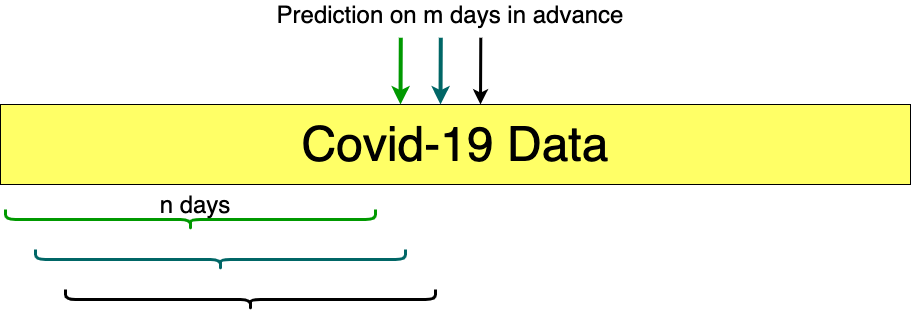

The approach that I am using in this project is shown in the diagram above. We will read the data for the first n days and then predict for m days in advance. Then we will hop ahead by one day and read the next chunk of data for the next n days. In this project, I will take n = 7, which mean I use the data for the first 7 days and predict for the 7 + m day. Hence this is a **Single-Step** model. And this Single-Step model can be used to generate a sequence of data points in the future, this will be covered in the Prepare test dataset section. 

The necessary python libraries are imported here-

* `numpy` is used to perform basic array operations
* `pyplot` from `matplotlib` is used to visualize the results
* `pandas` is used to read the dataset
* `MinMaxScaler` from `sklearn` is used scale the data

In [17]:
days_train = 7
days_in_advance = 1
days_in_advance_shifted = days_in_advance - 1

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [19]:
data = pd.read_csv('owid-covid-data_uk.csv', date_parser = True)

### Split the data
Here we are splitting the data into training and testing dataset. We are going to take data from March 2020 to December 2020 as training data. And we are going to take the data of January 2021 and February 2021 as testing data. In other words, we are using the data of January and February to see how well our predictions are. 

Note the data is **not** being randomly shuffled before splitting. This is for two reasons.

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the test results are more realistic, being evaluated on data collected after the model was trained.

In [20]:
data_training = data[data['date']<'2021-01-01'].copy()
data_test = data[data['date']>='2021-01-01'].copy()

We are dropping the column `date` from the training dataset

In [21]:
training_data = data_training.drop(['date'], axis = 1)
training_data.head()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,stringency_index,case_population_ratio,case_population_density_ratio
0,94.0,33.0,0.0,0.0,2.71,11.11,0.000001,0.344451
1,134.0,40.0,0.0,0.0,2.71,11.11,0.000002,0.491026
2,189.0,55.0,0.0,0.0,2.71,11.11,0.000003,0.692566
3,246.0,57.0,0.0,0.0,2.34,11.11,0.000004,0.901436
4,295.0,49.0,0.0,0.0,1.96,11.11,0.000004,1.080990


### Scale the data
The values in the training data are not in the same range. For getting all the values in between the range 0 to 1 we are going to use MinMaxScalar() to scale the data. This improves the accuracy of prediction. 

In [22]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

### Prepare train dataset

As mentioned above we are going to train the model on data of 7 days at a time. So the code mentioned below divides the data into chunks of 7 rows, store the first 7 days into `X_train`, and the 7 + m day into `y_train` (label). After dividing we are converting `X_train` and `y_train` into NumPy arrays.

Notice that the `y_train` is storing rows of training_data[i+days_in_advance_shifted][0], which will be all the `total_cases` of the 7 + m day. This implies that we are training the model to predict only one feature, and this is a **Single-Output** model.

The `if` condition ensure we don't access out of bound index for different value of m.

In [23]:
X_train = []
y_train = []

for i in range(days_train, training_data.shape[0]):
    if i + days_in_advance_shifted >= training_data.shape[0]:
      break
    X_train.append(training_data[i-days_train:i])
    y_train.append(training_data[i+days_in_advance_shifted, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

Also, let's take this opportunity to save the number of features as a variable, so it the code in the latter stage can be more clear.

In [24]:
features_nums = len(training_data[0])

### Building LSTM
Here we are importing the necessary layers to build out neural network

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], features_nums)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             11800     
_________________________________________________________________
dropout (Dropout)            (None, 7, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 32,051
Trainable params: 32,051
Non-trainable params: 0
_________________________________________________________________


 *   The first layer is the LSTM layer with 50 units.
 *   We will be using ReLu activation function.
 *   `return_sequence` when set to True returns the full sequence as the output.
 *   `input_shape` is set to `(X_train.shape[1], features_nums)` which is (14,8)
 *  The value passed in dropout specifies the probability at which outputs of the layer are dropped out.
 *  The last layer is the `Dense layer` is the regular deeply connected neural network layer.
 *  As we are predicting a **single** value the `units` in the last layer is set to 1.



## Why relu as activation function
[Reference: ReLU — Most popular Activation Function for Deep Neural Networks](https://medium.com/@sonish.sivarajkumar/relu-most-popular-activation-function-for-deep-neural-networks-10160af37dda)
<br/>
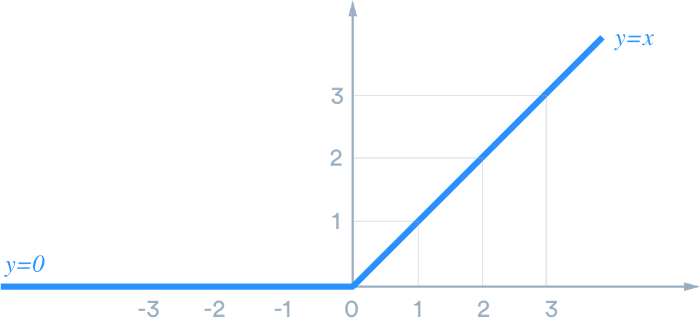

Relu is linear for all positive values, and zero for all negative values.
Which means:
1. It’s cheap to compute as there is no complicated math. The model can therefore take less time to train or run.
2. It converges faster. Linearity means that the slope doesn’t plateau, or “saturate,” when x gets large. It doesn’t have the vanishing gradient problem suffered by other activation functions like sigmoid or tanh.
3. It’s sparsely activated. Since ReLU is zero for all negative inputs, it’s likely for any given unit to not activate at all.

## Why mean squared error as loss function

[Reference: How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)
<br/>
Loss function used is `mean_squared_error`. This is chosen because we are solving a regression problem, and MSE is the default loss to ues for regression problems.

Mathematically, it is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. It is the loss function to be evaluated first and only changed if you have a good reason.

Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes.

## Why Adam as optimizer

[Reference: Various Optimization Algorithms For Training Neural Network](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6)
<br/>

Adam (Adaptive Moment Estimation) is said to be the best optimizer.
It has the advantages:

1. The method is too fast and converges rapidly
2. Rectifies vanishing learning rate, high variance.

Here we are compiling the model and fitting it to the training data. We will use 250 epochs to train the model. An epoch is an iteration over the entire data provided. batch_size is the number of samples per gradient update i.e. here the weights will be updates after 128 training examples.

In [26]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
history = model.fit(x=X_train, y=y_train, epochs=250, batch_size=128, shuffle=False)

In [27]:
# import tensorflow as tf
# model = tf.keras.models.load_model(f'/content/SNS_covid_prediction_{days_in_advance}_dia.h5')

## Visualize the loss function

In [28]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

## Prepare test dataset

In order to predict the `total_cases` m days in advance, we need the data of previous n + m to n days.

`past_days` contains the data required to predict the `total_cases` on 2021-1-1.
Even though `past_days` contains data from `data_training`, but the model has never train with these data as they are at the **tail**, these data are not used as label in the training process.
And we are going to append `data_test` to `past_days` and ignore the index of `data_test`. We will also drop the `date` column.

In [29]:
past_days = data_training.tail(days_train+days_in_advance_shifted)
df = past_days.append(data_test, ignore_index = True)
df = df.drop(['date'], axis = 1)
df.head()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,stringency_index,case_population_ratio,case_population_density_ratio
0,2227951.0,32803.0,70302.0,570.0,1.13,75.46,0.032819,8164.042976
1,2262739.0,34788.0,70513.0,211.0,1.12,79.63,0.033331,8291.519176
2,2295232.0,32493.0,70860.0,347.0,1.12,79.63,0.033810,8410.585640
3,2336692.0,41460.0,71217.0,357.0,1.30,79.63,0.034421,8562.510535
4,2389967.0,53275.0,71675.0,458.0,1.49,79.63,0.035206,8757.729994


Similar to the train dataset, we will need to **scale** the test data. Then we divide the data into chunks of 7 rows and put them into `X_test` and `y_test` (label) similar to how we prepare the train dataset.

In [30]:
inputs = scaler.transform(df)

X_test = []
y_test = []

for i in range(days_train, inputs.shape[0]):
    if i + days_in_advance_shifted >= inputs.shape[0]:
      break
    X_test.append(inputs[i-days_train:i])
    y_test.append(inputs[i+days_in_advance_shifted, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

We are now going to predict the `total_cases` for X_test using `predict()`

In [31]:
y_pred = model.predict(X_test)

As we had scaled all the values down, now we will have to get them back to the original scale. `scaler.scale_` gives the scaling level for all features, and `scaler.scale_[0]` gives the scaling for `total_cases`. 

In [32]:
scale = 1/scaler.scale_[0]

In [33]:
y_pred = y_pred*scale
y_test = y_test*scale

We can then flatten the array for prediction and real total case to calculate the percentage difference. We will also define the accuray of m days in advance as the mean of (100-abs_diff), which is the mean accuracy for prediction from 2021-1-1 to 2021-2-28.

In [34]:
pred = y_pred.flatten()
real = y_test.flatten()

In [35]:
# Percentage difference
diffs= ((pred-real)/real)*100
abs_diffs = 100-abs(diffs)

In [36]:
# Accuracy
accuracy = abs_diffs.mean()
accuracy

97.81098480177718

## Visulisation

We can now plot the result. And the code below will generate the time-axis which we are going to use in the plot.

In [37]:
train_datetime = data_training['date']
train_datetime = pd.to_datetime(train_datetime)

In [38]:
x_datetime = data_test['date']
x_datetime = pd.to_datetime(x_datetime)

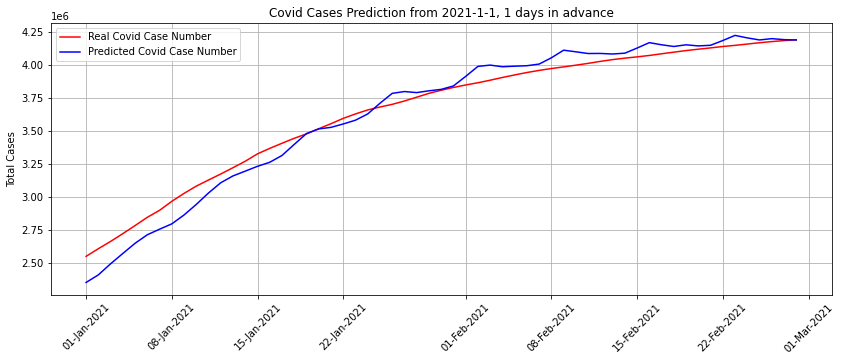

In [39]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(x_datetime, y_test, color = 'red', label = 'Real Covid Case Number')
ax.plot(x_datetime, y_pred, color = 'blue', label = 'Predicted Covid Case Number')
plt.title(f'Covid Cases Prediction from 2021-1-1, {days_in_advance} days in advance')
plt.ylabel('Total Cases')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
# Set the format of x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.savefig(f"total_case_compare_{days_in_advance}_dia.png")
plt.show()

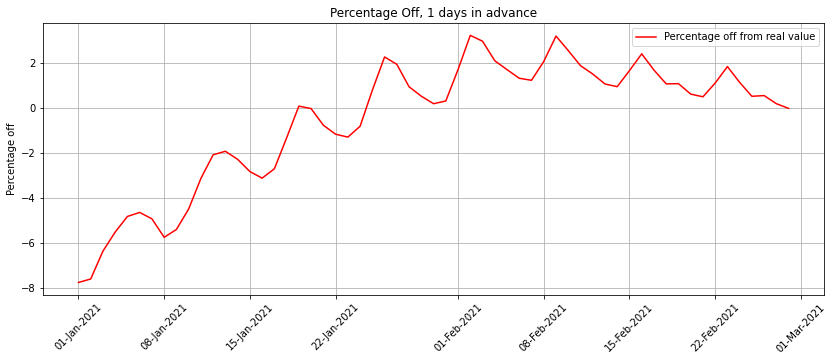

In [40]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(x_datetime, diffs, color = 'red', label = 'Percentage off from real value')
plt.title(f'Percentage Off, {days_in_advance} days in advance')
plt.ylabel('Percentage off')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.xticks(rotation=45)
# Set the format of x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.savefig(f"percentage_off_{days_in_advance}_dia.png")
plt.show()

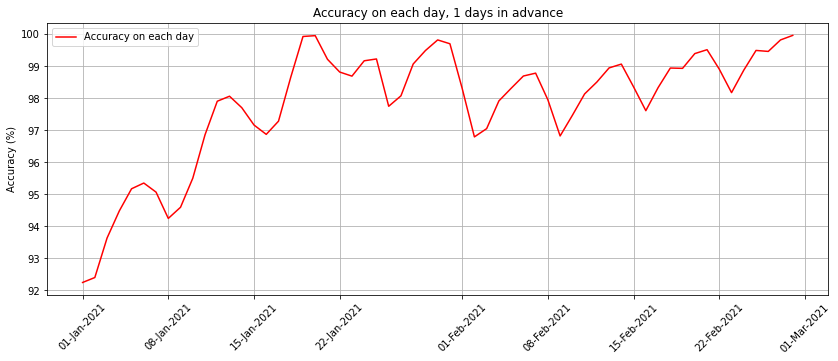

In [41]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(x_datetime, abs_diffs, color = 'red', label = 'Accuracy on each day')
plt.title(f'Accuracy on each day, {days_in_advance} days in advance')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.xticks(rotation=45)
# Set the format of x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.savefig(f"accuracy_each_day_{days_in_advance}_dia.png")
plt.show()

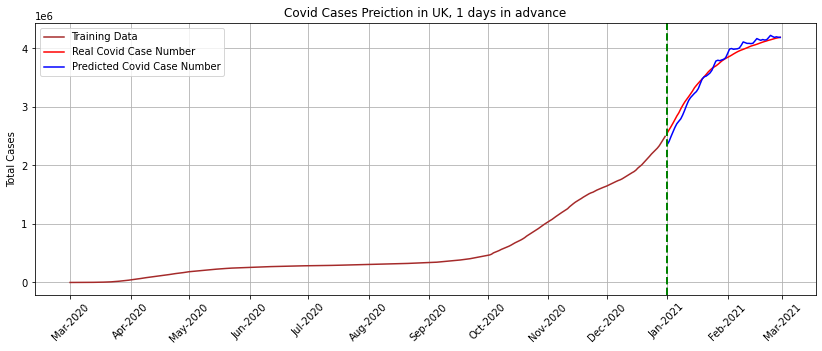

In [42]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(train_datetime, data_training['total_cases'], color = 'brown', label= 'Training Data')
ax.plot(x_datetime, y_test, color = 'red', label = 'Real Covid Case Number')
ax.plot(x_datetime, y_pred, color = 'blue', label = 'Predicted Covid Case Number')
ax.axvline(x=x_datetime[min(x_datetime.index)], color='green', linewidth=2, linestyle='--')
plt.title(f'Covid Cases Preiction in UK, {days_in_advance} days in advance')
plt.ylabel('Total Cases')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.savefig(f"full_year_{days_in_advance}_dia.png")
plt.show()

## Save the model

Finally, we save the model.
Notice that the commented code can be used to load the model we just train.

In [43]:
model.save(f'SNS_covid_prediction_{days_in_advance}_dia.h5')
# import tensorflow as tf
# model = tf.keras.models.load_model('path/to/location')